# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv('/Users/yuta-uebayashi/Desktop/Lede課題一覧/craftcans.csv')
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85


## How many rows do you have in the data? What are the column types?

In [3]:
len(df)

2416

In [4]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [5]:
beer_producers = df.groupby('Brewery')["Beer"].nunique()
beer_producers

Brewery
10 Barrel Brewing Company            1
18th Street Brewery                 14
2 Towns Ciderhouse                   4
21st Amendment Brewery              19
3 Daughters Brewing                  3
                                    ..
Woodchuck Hard Cider                 1
Woodstock Inn, Station & Brewery     2
Wormtown Brewery                     1
Worthy Brewing Company               5
Wynkoop Brewing Company              9
Name: Beer, Length: 551, dtype: int64

In [6]:
beer_producers.sort_values(ascending=False).head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           41
Sun King Brewing Company      38
Cigar City Brewing Company    24
Sixpoint Craft Ales           24
Great Crescent Brewery        20
SanTan Brewing Company        19
21st Amendment Brewery        19
Upslope Brewing Company       18
Stevens Point Brewery         18
Name: Beer, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [7]:
df["ABV_clean"] = df["ABV"].str.replace('%', '').astype(float)

most_common_abv = df["ABV_clean"].value_counts().head(1)

most_common_abv

ABV_clean
5.0    215
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [8]:
# ABV列を数値に変換（まだの場合）
df["ABV_clean"] = df["ABV"].str.replace('%', '').astype(float)

# describeで要約統計（平均・中央値・標準偏差など）
print(df["ABV_clean"].describe())

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV_clean, dtype: float64


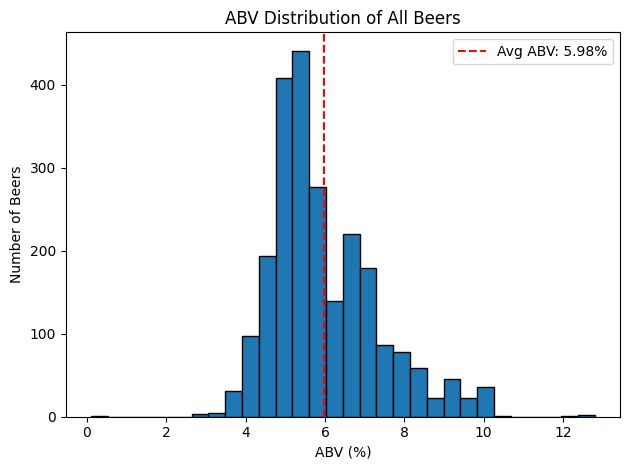

In [9]:
import matplotlib.pyplot as plt

plt.hist(df["ABV_clean"].dropna(), bins=30, edgecolor="black")
plt.title("ABV Distribution of All Beers")
plt.xlabel("ABV (%)")
plt.ylabel("Number of Beers")

mean_abv = df["ABV_clean"].mean()
plt.axvline(mean_abv, color='red', linestyle='--', label=f'Avg ABV: {round(mean_abv, 2)}%')
plt.legend()

plt.tight_layout()
plt.show()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [38]:
missing_abv_count = df["ABV"].isnull().sum()
f"Number of beers missing ABV: {missing_abv_count}"

'Number of beers missing ABV: 68'

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [42]:
df["City"] = df["Location"].str.split(",").str[0].str.strip()

top_cities = df.groupby("City")["Beer"].nunique()

top_10_cities = top_cities.sort_values(ascending=False).head(10)

top_10_cities

City
Grand Rapids     66
Portland         53
Chicago          52
Indianapolis     43
Boulder          41
Denver           40
San Diego        38
Brooklyn         37
Seattle          35
San Francisco    31
Name: Beer, dtype: int64

## List all of the beer from Brooklyn, NY

In [43]:
brooklyn_only = df[df["City"] == "Brooklyn"]
brooklyn_only

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABV_clean,City
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.00%,52,10.0,Brooklyn
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.20%,16,4.2,Brooklyn
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.00%,Does not apply,8.0,Brooklyn
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.00%,Does not apply,4.0,Brooklyn
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.20%,7,3.2,Brooklyn
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.50%,Does not apply,8.5,Brooklyn
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.50%,62,6.5,Brooklyn
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.70%,50,4.7,Brooklyn
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.90%,111,9.9,Brooklyn
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.70%,19,5.7,Brooklyn


## What brewery in Brooklyn puts out the most different cans of beer?

In [48]:
df["City"] = df["Location"].str.split(",").str[0].str.strip()
brooklyn_only = df[df["City"] == "Brooklyn"]

brewery_counts = brooklyn_only.groupby("Brewery")["Beer"].nunique()

top_brewery = brewery_counts.sort_values(ascending=False).head(1)

top_brewery

Brewery
Sixpoint Craft Ales    24
Name: Beer, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [50]:
sixpoint_df = df[df["Brewery"] == "Sixpoint Craft Ales"]

style_counts = sixpoint_df["Style"].value_counts()

top_5_styles = style_counts.head(5)
top_5_styles

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [52]:
ny_breweries = df[df["Location"].str.contains("NY", na=False)]

unique_ny_breweries = ny_breweries["Brewery"].dropna().unique()

unique_ny_breweries

array(['Sixpoint Craft Ales', 'Evil Twin Brewing', 'Chatham Brewing',
       'Newburgh Brewing Company', 'Southampton Publick House',
       'Montauk Brewing Company', 'Matt Brewing Company',
       'The Bronx Brewery', 'KelSo Beer Company', 'Brooklyn Brewery',
       'The Manhattan Brewing Company', 'Blue Point Brewing Company',
       'Bomb Beer Company', 'Dundee Brewing Company',
       'Upstate Brewing Company', 'Butternuts Beer and Ale'], dtype=object)

### Now *count* all of the breweries in New York state

In [54]:
df["State"] = df["Location"].str.split(",").str[1].str.strip()

ny_df = df[df["State"] == "NY"]

ny_brewery_count = ny_df["Brewery"].dropna().nunique()

f"Number of breweries in New York is {ny_brewery_count}."

'Number of breweries in New York is 16.'

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [55]:
ipa_beers = df[df["Style"].str.contains("IPA", na=False)]
ipa_beers

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABV_clean,City,State
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50,4.5,Minneapolis,MN
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68,8.0,Louisville,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60%,68,7.6,Louisville,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00%,65,6.0,Louisville,KY
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00%,100,8.0,San Diego,CA
...,...,...,...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.70%,120,9.7,Brooklyn Center,MN
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.20%,99,6.2,Brooklyn Center,MN
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.00%,65,7.0,San Francisco,CA
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100,9.9,Longmont,CO


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [59]:
df.dtypes

Beer          object
Brewery       object
Location      object
Style         object
Size          object
ABV           object
IBUs          object
ABV_clean    float64
City          object
State         object
dtype: object

In [64]:
df["IBU_clean"] = pd.to_numeric(df["IBUs"], errors="coerce")

average_ibu = df["IBU_clean"].mean()

round(average_ibu, 2)

np.float64(42.71)

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

Text(0, 0.5, 'Number of Beers')

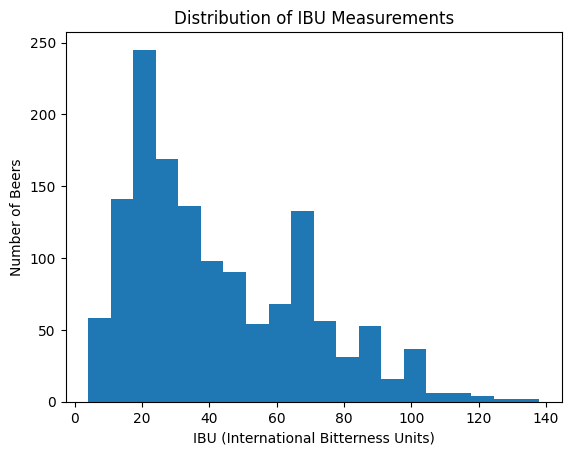

In [69]:
import matplotlib.pyplot as plt

plt.hist(df["IBU_clean"].dropna(), bins=20)

plt.title("Distribution of IBU Measurements")
plt.xlabel("IBU (International Bitterness Units)")
plt.ylabel("Number of Beers")

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [74]:
df["IBU_clean"] = pd.to_numeric(df["IBUs"], errors="coerce")

ibu_75 = df["IBU_clean"].quantile(0.75)
high_ibu_beers = df[df["IBU_clean"] > ibu_75]

print(high_ibu_beers[["Beer", "Brewery", "Style", "IBU_clean"]])

                         Beer                    Brewery  \
6              Citra Ass Down  Against the Grain Brewery   
7              London Balling  Against the Grain Brewery   
14                Rico Sauvin  Against the Grain Brewery   
17               Pile of Face  Against the Grain Brewery   
21                 Excess IPL   Jack's Abby Craft Lagers   
...                       ...                        ...   
2408    Brew Free! or Die IPA     21st Amendment Brewery   
2410  Ten Fidy Imperial Stout        Oskar Blues Brewery   
2412       GUBNA Imperial IPA        Oskar Blues Brewery   
2414        Gordon Ale (2009)        Oskar Blues Brewery   
2415          Dale's Pale Ale        Oskar Blues Brewery   

                               Style  IBU_clean  
6     American Double / Imperial IPA       68.0  
7                 English Barleywine       80.0  
14    American Double / Imperial IPA       68.0  
17                      American IPA       65.0  
21         American India Pal

## List all of the beers with IBUs below the 25th percentile

In [76]:
df["IBU_clean"] = pd.to_numeric(df["IBUs"], errors="coerce")

ibu_25 = df["IBU_clean"].quantile(0.25)
low_ibu_beers = df[df["IBU_clean"] < ibu_25]

low_ibu_beers[["Beer", "Brewery",  "IBU_clean"]]

,Beer,Brewery,IBU_clean
2,Wall's End,NorthGate Brewing,19.0
12,Sho'nuff,Against the Grain Brewery,13.0
13,Bloody Show,Against the Grain Brewery,17.0
18,The Brown Note,Against the Grain Brewery,20.0
19,House Lager,Jack's Abby Craft Lagers,18.0
...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,20.0
2385,Bikini Blonde Lager,Maui Brewing Company,18.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,11.0
2404,Hell,Surly Brewing Company,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

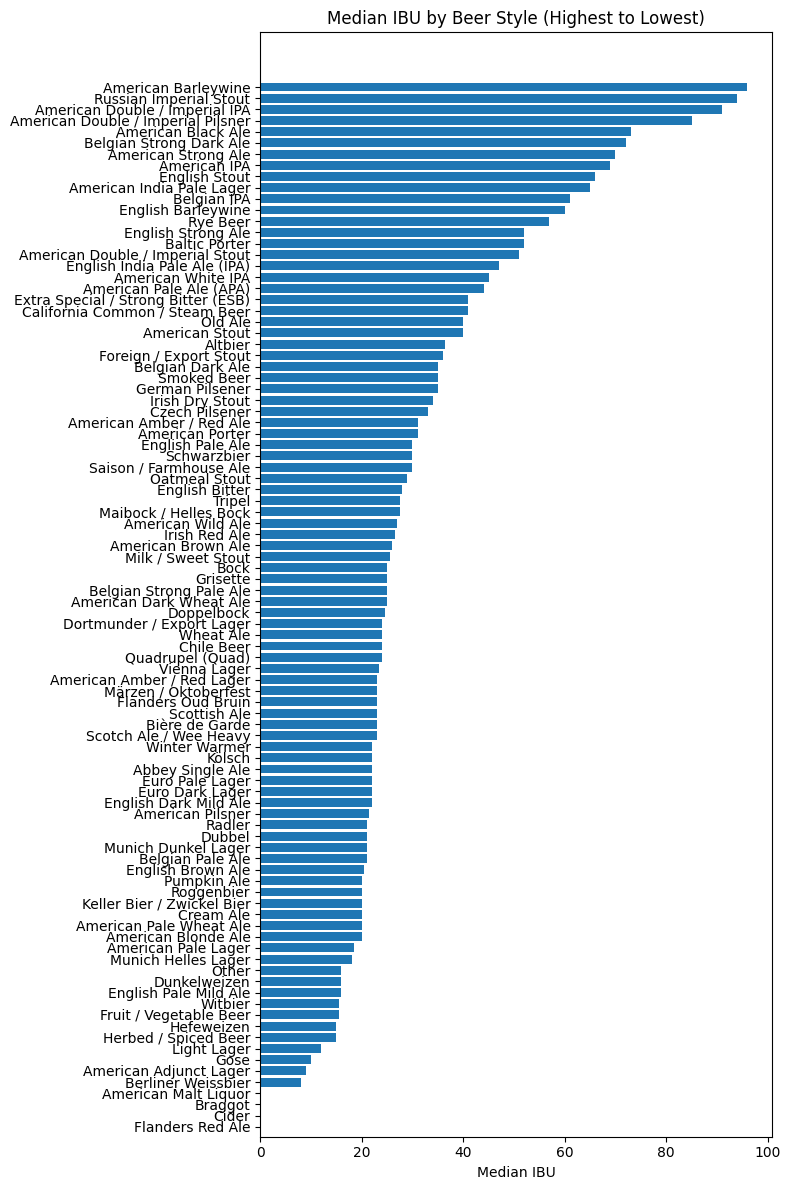

In [81]:
import matplotlib.pyplot as plt

df["IBU_clean"] = pd.to_numeric(df["IBUs"], errors="coerce")

median_ibus = df.groupby("Style")["IBU_clean"].median().reset_index()

median_ibus_sorted = median_ibus.sort_values(by="IBU_clean", ascending=False, na_position="last")

plt.figure(figsize=(8, 12))
plt.barh(median_ibus_sorted["Style"], median_ibus_sorted["IBU_clean"])
plt.xlabel("Median IBU")
plt.title("Median IBU by Beer Style (Highest to Lowest)")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [87]:
df["IBU_clean"] = pd.to_numeric(df["IBUs"], errors="coerce")

ibu_25 = df["IBU_clean"].quantile(0.25)
ibu_75 = df["IBU_clean"].quantile(0.75)

high_ibu_beers = df[df["IBU_clean"] > ibu_75]

high_ibu_styles = high_ibu_beers["Style"].value_counts().head(5)

print(f"Top 5 styles of HIGH-IBU beer:")
print(high_ibu_styles)

low_ibu_beers = df[df["IBU_clean"] < ibu_25]

low_ibu_styles = low_ibu_beers["Style"].value_counts().head(5)

print(f"\nTop 5 styles of LOW-IBU beer:")
print(low_ibu_styles)

Top 5 styles of HIGH-IBU beer:
Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

Top 5 styles of LOW-IBU beer:
Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: count, dtype: int64


## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

Average IBU of wheat beers: 18.5


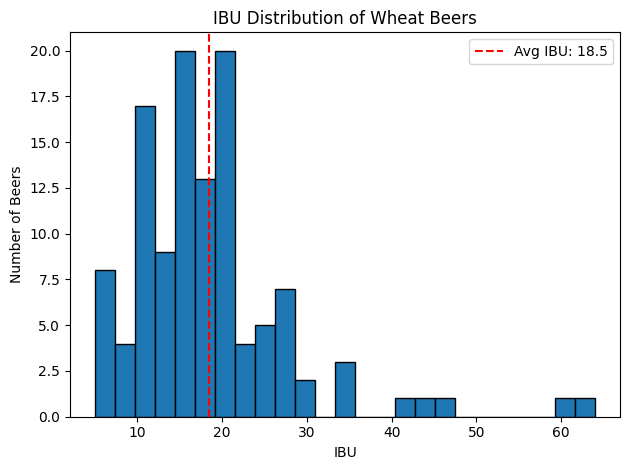

In [88]:
import matplotlib.pyplot as plt

df["IBU_clean"] = pd.to_numeric(df["IBUs"], errors="coerce")

wheat_styles = [
    "Witbier",
    "Hefeweizen",
    "American Pale Wheat Ale",
    "Berliner Weissbier",
    "Weissbier",
    "Kristalweizen",
    "Wheat Beer",
    "American Wheat Ale"
]

wheat_beers = df[df["Style"].isin(wheat_styles) & df["IBU_clean"].notna()]

average_wheat_ibu = wheat_beers["IBU_clean"].mean()
print("Average IBU of wheat beers:", round(average_wheat_ibu, 2))

plt.hist(wheat_beers["IBU_clean"], bins=25, edgecolor="black")
plt.title("IBU Distribution of Wheat Beers")
plt.xlabel("IBU")
plt.ylabel("Number of Beers")
plt.axvline(average_wheat_ibu, color='red', linestyle='--', label=f'Avg IBU: {round(average_wheat_ibu,2)}')
plt.legend()
plt.tight_layout()
plt.show()

## Draw a histogram of the IBUs of those beers

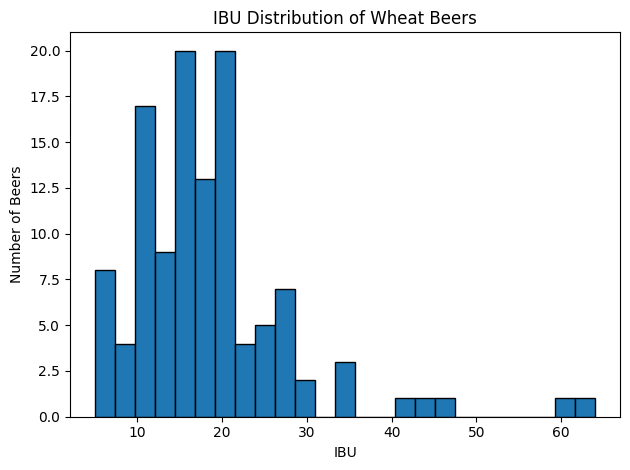

In [90]:
import matplotlib.pyplot as plt

# IBU列を数値に変換（前処理済みならスキップ可）
df["IBU_clean"] = pd.to_numeric(df["IBUs"], errors="coerce")

wheat_styles = [
    "Witbier",
    "Hefeweizen",
    "American Pale Wheat Ale",
    "Berliner Weissbier",
    "Weissbier",
    "Kristalweizen",
    "Wheat Beer",
    "American Wheat Ale"
]

wheat_beers = df[df["Style"].isin(wheat_styles) & df["IBU_clean"].notna()]

plt.hist(wheat_beers["IBU_clean"], bins=25, edgecolor='black')
plt.title("IBU Distribution of Wheat Beers")
plt.xlabel("IBU")
plt.ylabel("Number of Beers")
plt.tight_layout()
plt.show()


## Get the average IBU of any style with "IPA" in it (also draw a histogram)

Average IBU of IPA styles: 71.95


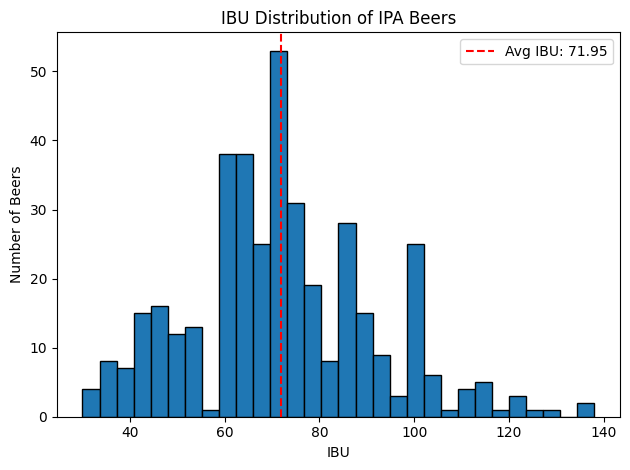

In [92]:
import matplotlib.pyplot as plt

df["IBU_clean"] = pd.to_numeric(df["IBUs"], errors="coerce")

ipa_beers = df[df["Style"].str.contains("IPA", na=False)]

ipa_beers = ipa_beers[ipa_beers["IBU_clean"].notna()]

average_ipa_ibu = ipa_beers["IBU_clean"].mean()
print("Average IBU of IPA styles:", round(average_ipa_ibu, 2))

plt.hist(ipa_beers["IBU_clean"], bins=30, edgecolor='black')
plt.title("IBU Distribution of IPA Beers")
plt.xlabel("IBU")
plt.ylabel("Number of Beers")
plt.axvline(average_ipa_ibu, color='red', linestyle='--', label=f'Avg IBU: {round(average_ipa_ibu, 2)}')
plt.legend()
plt.tight_layout()
plt.show()

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

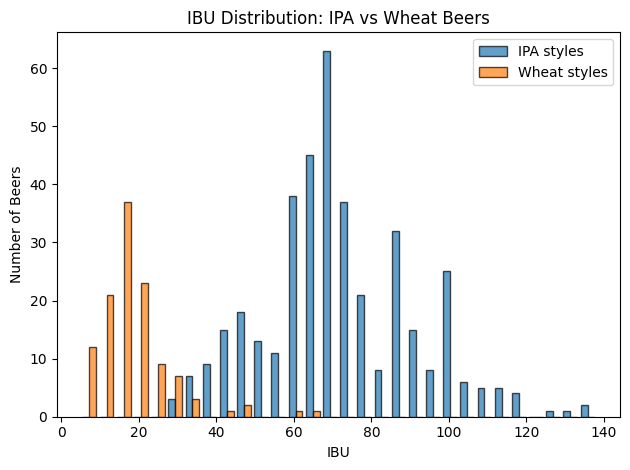

In [95]:
import matplotlib.pyplot as plt

df["IBU_clean"] = pd.to_numeric(df["IBUs"], errors="coerce")

ipa_beers = df[df["Style"].str.contains("IPA", na=False) & df["IBU_clean"].notna()]
ipa_ibus = ipa_beers["IBU_clean"]

wheat_styles = [
    "Witbier", "Hefeweizen", "American Pale Wheat Ale",
    "Berliner Weissbier", "Weissbier", "Kristalweizen",
    "Wheat Beer", "American Wheat Ale"
]
wheat_beers = df[df["Style"].isin(wheat_styles) & df["IBU_clean"].notna()]
wheat_ibus = wheat_beers["IBU_clean"]

plt.hist([ipa_ibus, wheat_ibus], bins=30, label=["IPA styles", "Wheat styles"], edgecolor='black', alpha=0.7)
plt.title("IBU Distribution: IPA vs Wheat Beers")
plt.xlabel("IBU")
plt.ylabel("Number of Beers")
plt.legend()
plt.tight_layout()
plt.show()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

Average ABV of wheat beers: 5.0%
Average ABV of IPA beers: 6.88%


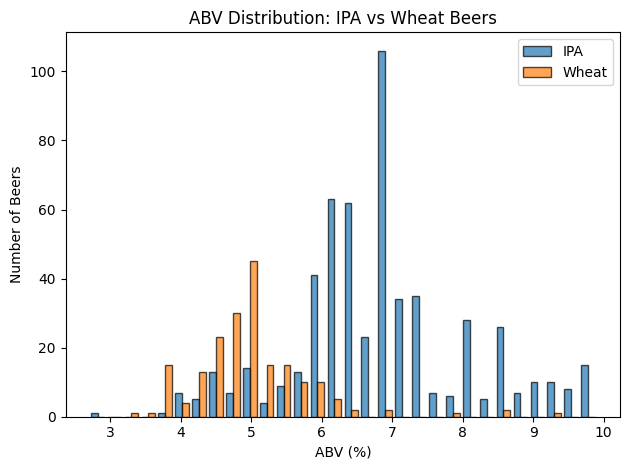

In [98]:
import matplotlib.pyplot as plt

df["ABV_clean"] = df["ABV"].str.replace('%', '').astype(float)

wheat_styles = [
    "Witbier", "Hefeweizen", "American Pale Wheat Ale",
    "Berliner Weissbier", "Weissbier", "Kristalweizen",
    "Wheat Beer", "American Wheat Ale"
]

wheat_abv = df[df["Style"].isin(wheat_styles) & df["ABV_clean"].notna()]["ABV_clean"]

ipa_abv = df[df["Style"].str.contains("IPA", na=False) & df["ABV_clean"].notna()]["ABV_clean"]

avg_wheat_abv = wheat_abv.mean()
avg_ipa_abv = ipa_abv.mean()

print(f"Average ABV of wheat beers: {round(avg_wheat_abv, 2)}%")
print(f"Average ABV of IPA beers: {round(avg_ipa_abv, 2)}%")

plt.hist([ipa_abv, wheat_abv], bins=30, alpha=0.7, edgecolor='black', label=["IPA", "Wheat"])
plt.title("ABV Distribution: IPA vs Wheat Beers")
plt.xlabel("ABV (%)")
plt.ylabel("Number of Beers")
plt.legend()
plt.tight_layout()
plt.show()

## Good work!